In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
import seaborn as sns

In [6]:
medic_sql = """SELECT a.year, a.gungu, a.dong, @prev as prev_avg,
         a.avg_minute - @prev as GROWTH,
        @prev := a.avg_minute as avg_minute
FROM (SELECT year, gungu, dong, avg_minute
        FROM TRANSPORTATION_ACCESSIBILITY 
        WHERE sido = "서울특별시" and CATEGORY like "%의료%" and mode = "대중교통"
        ORDER BY gungu, DONG, year ASC) a
HAVING a.year != 2016
ORDER BY growth ASC
LIMIT 10"""

In [7]:
transport_sql = """SELECT a.year, a.gungu, a.dong, @prev as prev_avg,
         a.avg_minute - @prev as GROWTH,
        @prev := a.avg_minute as avg_minute
FROM (SELECT year, gungu, dong, avg_minute
        FROM TRANSPORTATION_ACCESSIBILITY 
        WHERE sido = "서울특별시" and CATEGORY like "%교통%" and mode = "대중교통"
        ORDER BY gungu, DONG, year ASC) a
HAVING a.year != 2016
ORDER BY growth ASC
LIMIT 10"""

In [8]:
edu_sql = """SELECT a.year, a.gungu, a.dong, @prev as prev_avg,
         a.avg_minute - @prev as GROWTH,
        @prev := a.avg_minute as avg_minute
FROM (SELECT year, gungu, dong, avg_minute
        FROM TRANSPORTATION_ACCESSIBILITY 
        WHERE sido = "서울특별시" and CATEGORY like "%교육%" and mode = "대중교통"
        ORDER BY gungu, DONG, year ASC) a
HAVING a.year != 2016
ORDER BY growth ASC
LIMIT 10"""

In [9]:
cursor.execute(medic_sql)
result = cursor.fetchall()

medic = pd.DataFrame(result)
medic.columns = [desc[0] for desc in cursor.description]
medic

,year,gungu,dong,prev_avg,GROWTH,avg_minute
0,2017,-,-,None,NaN,11.515513
1,2017,송파구,가락1동,17.748519294,-7.144932,10.603587
2,2017,강동구,성내1동,13.75924877,-6.258908,7.500340
3,2017,양천구,신정1동,14.306436174666667,-5.315384,8.991052
4,2017,영등포구,양평1동,13.671295242999998,-5.201447,8.469848
5,2020,강동구,강일동,17.135671879300993,-5.199759,11.935913
6,2017,영등포구,당산1동,11.260445040999999,-4.774652,6.485793
7,2017,양천구,신정6동,13.297808054,-4.632263,8.665545
8,2017,송파구,풍납1동,16.013990569,-4.488260,11.525730
9,2017,양천구,신정2동,14.823031359,-4.467912,10.355119


In [10]:
cursor.execute(transport_sql)
result = cursor.fetchall()

transport = pd.DataFrame(result)
transport.columns = [desc[0] for desc in cursor.description]
transport

,year,gungu,dong,prev_avg,GROWTH,avg_minute
0,2017,강서구,-,53.112560,-20.683128,32.429432
1,2017,송파구,가락1동,44.725239,-10.730605,33.994634
2,2019,성북구,정릉4동,57.818855,-8.767068,49.051787
3,2017,동대문구,-,46.723430,-8.621055,38.102375
4,2019,성북구,정릉3동,57.221517,-8.522171,48.699346
5,2019,송파구,마천2동,57.491447,-8.231927,49.259520
6,2019,노원구,중계본동,60.044104,-8.046668,51.997436
7,2019,종로구,부암동,49.624165,-7.837443,41.786721
8,2017,서초구,-,40.556516,-7.641336,32.915180
9,2019,강동구,고덕2동,62.648791,-7.546370,55.102421


In [11]:
cursor.execute(edu_sql)
result = cursor.fetchall()

edu = pd.DataFrame(result)
edu.columns = [desc[0] for desc in cursor.description]
edu

,year,gungu,dong,prev_avg,GROWTH,avg_minute
0,2017,-,-,32.740855,-25.538868,7.201986
1,2017,중랑구,-,11.227564,-3.916051,7.311513
2,2017,서초구,내곡동,15.801918,-3.302155,12.499764
3,2020,강동구,둔촌1동,9.390731,-3.228078,6.162653
4,2017,금천구,-,10.594777,-2.841016,7.753762
5,2020,중구,회현동,13.293869,-2.665654,10.628215
6,2020,중구,명동,11.888793,-2.654843,9.233950
7,2017,관악구,-,9.721098,-2.591210,7.129888
8,2019,송파구,마천1동,14.066330,-2.489435,11.576895
9,2017,마포구,-,9.886169,-2.452725,7.433444


In [80]:
gu = "강동구"
dong = "%둔촌동%"

test = """WHERE 
gu = '%s' and dong like '%s'
thing'thing'k
""" % (gu, dong)

In [77]:
test

"WHERE \ngu = '강동구' and dong like '%둔촌동%'\nthingthingk\n"

# 아파트 매매가

In [114]:
gu = "성북구"
dong = "%정릉동%"

sql = """SELECT a.DONG, a.YEAR, @prev as prev_price, 
                round(100 * case @prev when 0 then 0 else (a.price - @prev) / @prev end, 4) as GROWTH,
                @prev := a.price as PRICE
         FROM (SELECT year, gu, dong, avg(price) as price
               FROM DONG_PRICE 
               WHERE gu = '%s' and dong like '%s'
               GROUP BY year
               ORDER BY Year asc, month asc) a""" % (gu, dong)

# sql = "SELECT a.DONG, a.YEAR, a.MONTH, @prev as prev_price, \
#                 concat(round(100 * case @prev when 0 then 0 else (a.price - @prev) / @prev end, 4), '%') as GROWTH,\
#                 @prev := a.price as price_this_month\
#          FROM (SELECT year, month, gu, dong, price\
#                 FROM DONG_PRICE \
#                 WHERE gu = %s and dong like %s\
#                 ORDER BY Year asc, month asc) a" % (gu, dong)

In [51]:
capital_sql = """SELECT * from APARTMENT_AVG_PRICE_CATEGORY_MONTHLY WHERE CATEGORY = '수도권'"""

In [115]:
cursor.execute(sql)
result = cursor.fetchall()

jungreung = pd.DataFrame(result)
jungreung.columns = [desc[0] for desc in cursor.description]
jungreung[1:]

,DONG,YEAR,prev_price,GROWTH,PRICE
1,정릉동,2015,307310639.2500,7.5082,330384211.5833
2,정릉동,2016,330384211.5833,8.0768,357068775.0833
3,정릉동,2017,357068775.0833,8.0270,385730576.5833
4,정릉동,2018,385730576.5833,7.8333,415946129.6667
5,정릉동,2019,415946129.6667,9.2186,454290696.5833
6,정릉동,2020,454290696.5833,20.9700,549555572.5833
7,정릉동,2021,549555572.5833,27.0343,698123952.8333
8,정릉동,2022,698123952.8333,-17.6516,574893727.5833
9,정릉동,2023,574893727.5833,-3.1422,556829409.2500
10,정릉동,2024,556829409.2500,7.8159,600350907.6250


In [83]:
cursor.execute(sql)
result = cursor.fetchall()

dong = pd.DataFrame(result)
dong.columns = [desc[0] for desc in cursor.description]
dong[1:]

,DONG,YEAR,MONTH,prev_price,GROWTH,PRICE
1,둔촌동,2014,2,532210000,2.4444,545219298
2,둔촌동,2014,3,545219298,-5.1481,517150793
3,둔촌동,2014,4,517150793,14.0823,589977272
4,둔촌동,2014,5,589977272,-6.6520,550732142
5,둔촌동,2014,6,550732142,1.7664,560460526
...,...,...,...,...,...,...
121,둔촌동,2024,4,868100000,2.6571,891166666
122,둔촌동,2024,5,891166666,-7.1068,827833333
123,둔촌동,2024,6,827833333,19.8711,992333333
124,둔촌동,2024,7,992333333,0.0798,993125000


In [118]:
remote.close()

In [108]:
dong[(dong["YEAR"] > 2018) & (dong["YEAR"] < 2022)]

,DONG,YEAR,MONTH,prev_price,GROWTH,PRICE,DATE
60,둔촌동,2019,1,935375000,24.0813,1160625000,2019.1
61,둔촌동,2019,2,1160625000,-18.3630,947500000,2019.2
62,둔촌동,2019,3,947500000,15.1595,1091136363,2019.3
63,둔촌동,2019,4,1091136363,2.7522,1121166666,2019.4
64,둔촌동,2019,5,1121166666,-4.9083,1066136363,2019.5
65,둔촌동,2019,6,1066136363,-11.6219,942230769,2019.6
66,둔촌동,2019,7,942230769,-3.4192,910013888,2019.7
67,둔촌동,2019,8,910013888,12.1680,1020744262,2019.8
68,둔촌동,2019,9,1020744262,-9.9684,918992307,2019.9
69,둔촌동,2019,10,918992307,3.1043,947520408,2019.10


In [29]:
cursor.execute(sql)
result = cursor.fetchall()

garak = pd.DataFrame(result)
garak.columns = [desc[0] for desc in cursor.description]
garak[1:]

,dong,year,month,prev_price,GROWTH,price_this_month
1,가락동,2014,2,545547967,-1.0114%,540030434
2,가락동,2014,3,540030434,-7.3648%,500258333
3,가락동,2014,4,500258333,2.4360%,512444444
4,가락동,2014,5,512444444,4.1184%,533548717
5,가락동,2014,6,533548717,-6.0752%,501134328
...,...,...,...,...,...,...
123,가락동,2024,4,1628026666,-4.9832%,1546898550
124,가락동,2024,5,1546898550,5.1614%,1626740506
125,가락동,2024,6,1626740506,-4.2916%,1556927480
126,가락동,2024,7,1556927480,3.2391%,1607357638


In [88]:
date_list = []

for i, row in dong.iterrows():
    date_list.append(str(row["YEAR"]) + "." + str(row["MONTH"]))

In [89]:
dong["DATE"] = date_list

In [15]:
cursor.execute(capital_sql)
result = cursor.fetchall()

capital_area = pd.DataFrame(result)
capital_area.columns = [desc[0] for desc in cursor.description]
capital_area

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,수도권,336244000
1,2014,2,수도권,337285000
2,2014,3,수도권,338751000
3,2014,4,수도권,338822000
4,2014,5,수도권,338573000
...,...,...,...,...
123,2024,4,수도권,664664000
124,2024,5,수도권,665731000
125,2024,6,수도권,669144000
126,2024,7,수도권,676207000


In [16]:
date_list = []

for i, row in capital_area.iterrows():
    date_list.append(str(row["YEAR"]) + "." + str(row["MONTH"]))

In [17]:
capital_area["DATE"] = date_list

In [121]:
remote.close()

# 시각화

In [40]:
from datetime import datetime

In [ ]:
# # 2016년 코스피 지수
# start = datetime(2016, 1, 1)
# end = datetime(2016, 12, 31)
# df = garak.get_data_yahoo('^KS11', start, end)
# plt.plot(df['Adj Close'])
# plt.xticks(rotation=30)

# # 강조 구간 (8/1 ~ 8/15)
# span_start = datetime(2016, 8, 1)
# span_end = datetime(2016, 8, 15)
# plt.axvspan(span_start, span_end, facecolor='gray', alpha=0.5)

# plt.show()

TypeError: string indices must be integers

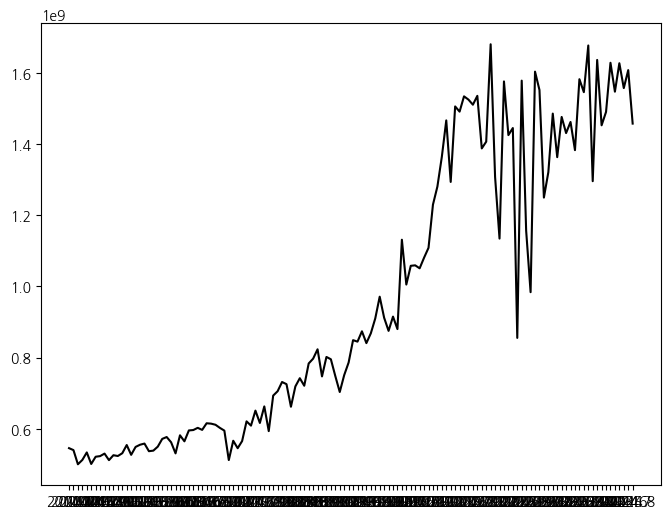

TypeError: string indices must be integers

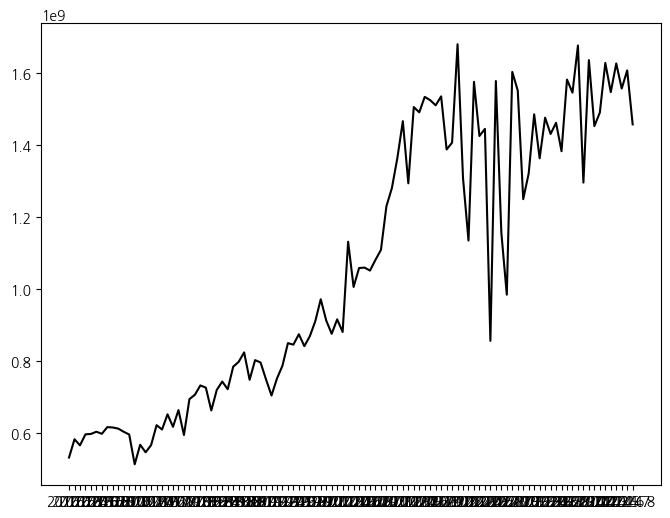

In [120]:
plt.figure(figsize=(8,6))
plt.plot(garak["DATE"][24:], garak["price_this_month"][24:], "k-", label = "송파구 가락동 평균")
plt.plot(dong["DATE"][24:], dong["PRICE"][24:], "b-", label = "강동구 둔촌동 평균")
#plt.plot(dong["DATE"][24:60], dong["PRICE"][24:60], "b-", label = "%s %s 평균") % (gu, dong)
#plt.plot(jungreung["YEAR"], jungreung["PRICE"], "r-", label = "성북구 정릉동 평균")
plt.plot(capital_area["DATE"][24:], capital_area["PRICE"][24:], "g--", label = "수도권 평균")
plt.xticks(np.arange(12, step=12))
plt.legend()

span_start = "2017.1"
span_end = "2017.12"
plt.axvspan(span_start, span_end, facecolor='gray', alpha=0.5)

plt.show()

In [125]:
dong_sql = """
SELECT * FROM DONG_PRICE_NEW ORDER BY gu, dong, YEAR
"""

In [ ]:
cursor.execute(dong_sql)
result = cursor.fetchall()

dong_price = pd.DataFrame(result)
dong_price.columns = [desc[0] for desc in cursor.description]
dong_price.head()

In [ ]:
remote.close()

# 심기일전!

In [3]:
medic_sql = """
SELECT b.YEAR, b.GUNGU GU, b.DONG, b.GROWTH
--        ,round(b.prev_avg, 6) prev_avg, ROUND(b.avg_minute, 6) avg_minute
FROM (select a.YEAR, a.GUNGU, a.DONG, @prev as prev_avg,
      100 * (a.avg_minute - @prev) / @prev as GROWTH,
      @prev := a.avg_minute as avg_minute
      FROM (SELECT year, gungu, dong, avg_minute
            FROM TRANSPORTATION_ACCESSIBILITY 
            WHERE sido = "서울특별시" and CATEGORY like "%의료%" and mode = "대중교통"
            ORDER BY gungu, DONG, year ASC) a ) b
HAVING b.year != 2016 AND b.dong != "-"
ORDER BY growth ASC
"""

edu_sql = """
SELECT b.YEAR, b.GUNGU GU, b.DONG, b.GROWTH
--        ,round(b.prev_avg, 6) prev_avg, ROUND(b.avg_minute, 6) avg_minute
FROM (select a.YEAR, a.GUNGU, a.DONG, @prev as prev_avg,
      100 * (a.avg_minute - @prev) / @prev as GROWTH,
      @prev := a.avg_minute as avg_minute
      FROM (SELECT year, gungu, dong, avg_minute
            FROM TRANSPORTATION_ACCESSIBILITY 
            WHERE sido = "서울특별시" and CATEGORY like "%교육%" and mode = "대중교통"
            ORDER BY gungu, DONG, year ASC) a ) b
HAVING b.year != 2016 AND b.dong != "-"
ORDER BY growth ASC
"""

transport_sql = """
SELECT b.YEAR, b.GUNGU GU, b.DONG, b.GROWTH
--        ,round(b.prev_avg, 6) prev_avg, ROUND(b.avg_minute, 6) avg_minute
FROM (select a.YEAR, a.GUNGU, a.DONG, @prev as prev_avg,
      100 * (a.avg_minute - @prev) / @prev as GROWTH,
      @prev := a.avg_minute as avg_minute
      FROM (SELECT year, gungu, dong, avg_minute
            FROM TRANSPORTATION_ACCESSIBILITY 
            WHERE sido = "서울특별시" and CATEGORY like "%교통%" and mode = "대중교통"
            ORDER BY gungu, DONG, year ASC) a ) b
HAVING b.year != 2016 AND b.dong != "-"
ORDER BY growth ASC
"""

In [4]:
cursor.execute(transport_sql)
result = cursor.fetchall()

acc_transport = pd.DataFrame(result)
acc_transport.columns = [desc[0] for desc in cursor.description]
acc_transport.head()

,YEAR,GU,DONG,GROWTH
0,2017,송파구,가락1동,-23.992281
1,2020,중구,회현동,-22.496632
2,2020,용산구,남영동,-18.429095
3,2020,중구,필동,-17.728537
4,2020,중랑구,면목2동,-17.643011


In [5]:
cursor.execute(edu_sql)
result = cursor.fetchall()

acc_edu = pd.DataFrame(result)
acc_edu.columns = [desc[0] for desc in cursor.description]
acc_edu.head()

,YEAR,GU,DONG,GROWTH
0,2020,강동구,둔촌1동,-34.375150
1,2019,강서구,방화1동,-26.457392
2,2020,중구,명동,-22.330633
3,2018,송파구,가락1동,-21.779460
4,2017,서초구,내곡동,-20.897176


In [6]:
cursor.execute(medic_sql)
result = cursor.fetchall()

acc_medical = pd.DataFrame(result)
acc_medical.columns = [desc[0] for desc in cursor.description]
acc_medical.head()

,YEAR,GU,DONG,GROWTH
0,2017,강동구,성내1동,-45.488737
1,2017,영등포구,당산1동,-42.401979
2,2017,송파구,가락1동,-40.256496
3,2017,영등포구,양평1동,-38.046484
4,2017,양천구,신정1동,-37.153794


In [7]:
remote.close()

In [8]:
acc_transport["TYPE"] = "교통"
acc_edu["TYPE"] = "교육"
acc_medical["TYPE"] = "의료"

In [10]:
access_growth = pd.concat((acc_transport, acc_edu, acc_medical), axis=1)
access_growth

,YEAR,GU,DONG,GROWTH,TYPE,YEAR,GU,DONG,GROWTH,TYPE,YEAR,GU,DONG,GROWTH,TYPE
0,2017,송파구,가락1동,-23.992281,교통,2020,강동구,둔촌1동,-34.375150,교육,2017,강동구,성내1동,-45.488737,의료
1,2020,중구,회현동,-22.496632,교통,2019,강서구,방화1동,-26.457392,교육,2017,영등포구,당산1동,-42.401979,의료
2,2020,용산구,남영동,-18.429095,교통,2020,중구,명동,-22.330633,교육,2017,송파구,가락1동,-40.256496,의료
3,2020,중구,필동,-17.728537,교통,2018,송파구,가락1동,-21.779460,교육,2017,영등포구,양평1동,-38.046484,의료
4,2020,중랑구,면목2동,-17.643011,교통,2017,서초구,내곡동,-20.897176,교육,2017,양천구,신정1동,-37.153794,의료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,2018,동작구,노량진2동,24.785647,교통,2017,종로구,교남동,62.024856,교육,2017,은평구,응암3동,31.943183,의료
2119,2018,서초구,반포3동,25.078504,교통,2017,중구,신당동,62.971121,교육,2018,관악구,행운동,33.137792,의료
2120,2018,강서구,가양2동,26.189821,교통,2017,관악구,은천동,65.297169,교육,2018,관악구,성현동,33.190061,의료
2121,2018,마포구,도화동,28.136636,교통,2017,중구,청구동,82.306949,교육,2019,송파구,가락1동,41.897183,의료


In [14]:
access_growth.head(7)

,YEAR,GU,DONG,GROWTH,TYPE,YEAR,GU,DONG,GROWTH,TYPE,YEAR,GU,DONG,GROWTH,TYPE
0,2017,송파구,가락1동,-23.992281,교통,2020,강동구,둔촌1동,-34.375150,교육,2017,강동구,성내1동,-45.488737,의료
1,2020,중구,회현동,-22.496632,교통,2019,강서구,방화1동,-26.457392,교육,2017,영등포구,당산1동,-42.401979,의료
2,2020,용산구,남영동,-18.429095,교통,2020,중구,명동,-22.330633,교육,2017,송파구,가락1동,-40.256496,의료
3,2020,중구,필동,-17.728537,교통,2018,송파구,가락1동,-21.779460,교육,2017,영등포구,양평1동,-38.046484,의료
4,2020,중랑구,면목2동,-17.643011,교통,2017,서초구,내곡동,-20.897176,교육,2017,양천구,신정1동,-37.153794,의료
5,2020,서초구,반포본동,-17.338949,교통,2020,중구,회현동,-20.051757,교육,2017,강동구,성내2동,-35.856145,의료
6,2020,중랑구,상봉2동,-17.257779,교통,2017,송파구,가락1동,-19.964380,교육,2017,양천구,목1동,-35.055123,의료
